In [2]:
# Download the Zip file
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2022-11-01 01:46:58--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.128, 142.250.148.128, 209.85.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip.1’

horse-or-human.zip. 100%[===================>] 142.65M   143MB/s    in 1.0s    

2022-11-01 01:46:59 (143 MB/s) - ‘horse-or-human.zip.1’ saved [149574867/149574867]



In [3]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2022-11-01 01:47:23--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.128, 142.250.148.128, 209.85.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  --.-KB/s    in 0.06s   

2022-11-01 01:47:24 (174 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [4]:
import zipfile

# Unzip the dataset

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('./horse-or-human')

# Unzip validation set
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')


zip_ref.close()


In [5]:
import os # os = operating system

train_horse_dir = os.path.join('./horse-or-human/horses')
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [6]:
train_horse_names = os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES:{train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS:{train_human_names[:10]}')

validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

TRAIN SET HORSES:['horse04-3.png', 'horse43-0.png', 'horse04-8.png', 'horse48-1.png', 'horse04-4.png', 'horse12-2.png', 'horse30-5.png', 'horse23-6.png', 'horse07-9.png', 'horse42-2.png']
TRAIN SET HUMANS:['human13-28.png', 'human10-13.png', 'human06-30.png', 'human14-13.png', 'human01-26.png', 'human12-21.png', 'human11-20.png', 'human01-06.png', 'human05-10.png', 'human08-22.png']
VAL SET HORSES: ['horse1-484.png', 'horse4-530.png', 'horse3-440.png', 'horse4-403.png', 'horse3-397.png', 'horse3-141.png', 'horse4-541.png', 'horse6-004.png', 'horse4-072.png', 'horse5-083.png']
VAL SET HUMANS: ['valhuman03-06.png', 'valhuman04-13.png', 'valhuman04-12.png', 'valhuman04-22.png', 'valhuman05-03.png', 'valhuman04-18.png', 'valhuman04-19.png', 'valhuman05-24.png', 'valhuman04-15.png', 'valhuman03-04.png']


In [7]:
print('total training horse images:', len(os.listdir(train_human_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 527
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

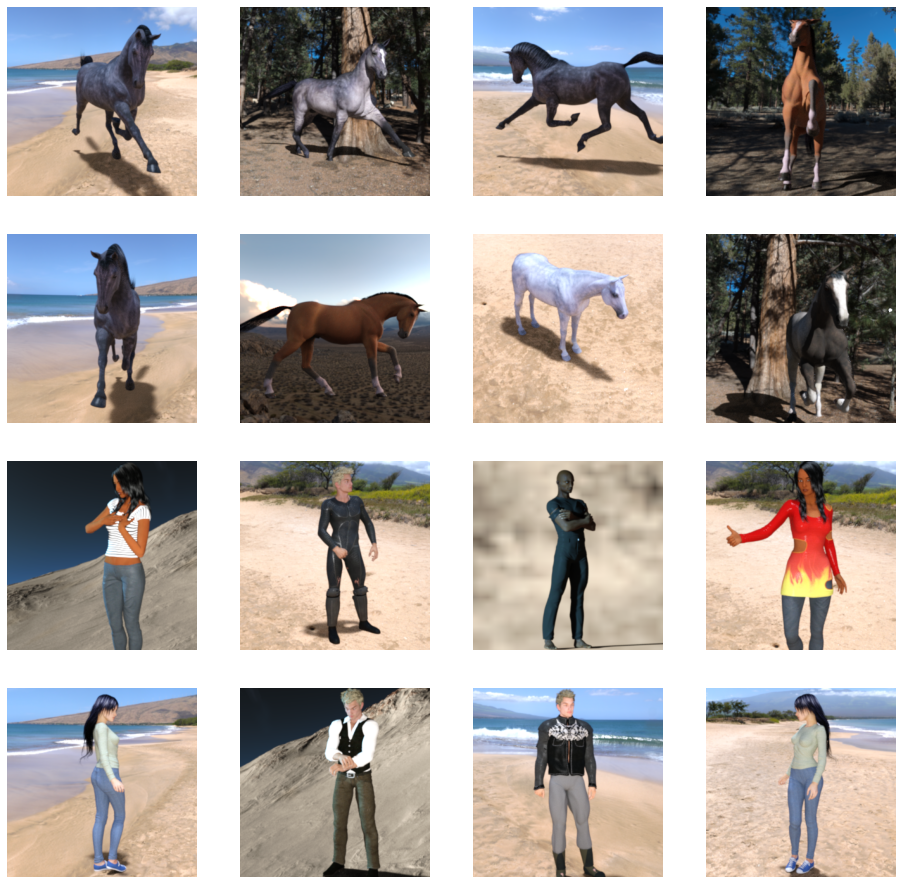

In [10]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [11]:
import tensorflow as tf

In [12]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [14]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    './horse-or-human/',
    target_size=(300,300),
    batch_size = 128,
    class_mode = 'binary'
)

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for validation images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 107s 13s/step - loss: 0.7423 - accuracy: 0.5628 - val_loss: 0.6719 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 95s 12s/step - loss: 0.6909 - accuracy: 0.5884 - val_loss: 0.4998 - val_accuracy: 0.6797
Epoch 3/15
8/8 [==============================] - 93s 13s/step - loss: 1.0303 - accuracy: 0.6707 - val_loss: 3.3924 - val_accuracy: 0.5078
Epoch 4/15
8/8 [==============================] - 95s 12s/step - loss: 0.6019 - accuracy: 0.8087 - val_loss: 0.2923 - val_accuracy: 0.8867
Epoch 5/15
8/8 [==============================] - 93s 11s/step - loss: 0.3102 - accuracy: 0.8643 - val_loss: 0.9731 - val_accuracy: 0.8320
Epoch 6/15
8/8 [==============================] - 100s 12s/step - loss: 0.3836 - accuracy: 0.8699 - val_loss: 0.6683 - val_accuracy: 0.8672
Epoch 7/15
8/8 [==============================] - 94s 11s/step - loss: 0.1797 - accuracy: 0.9277 - val_loss: 1.7820 - val_accuracy: 0.7656
Epoch 8/15
8/8 [=========

In [29]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
    
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving photo-1438761681033-6461ffad8d80.jpeg to photo-1438761681033-6461ffad8d80 (1).jpeg
1/1 [==============================] - 0s 53ms/step
[0.2603222]
photo-1438761681033-6461ffad8d80.jpeg is a horse


1/1 [==============================] - 0s 153ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


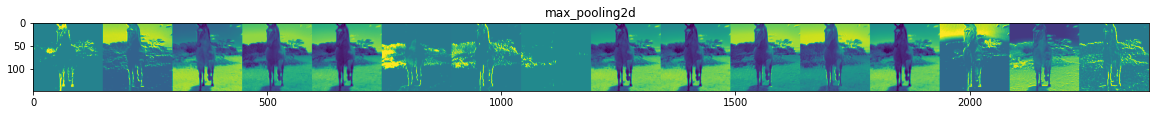

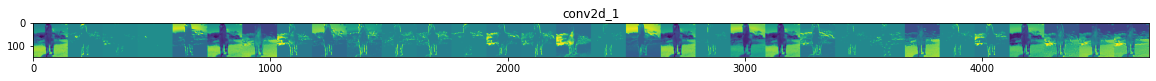

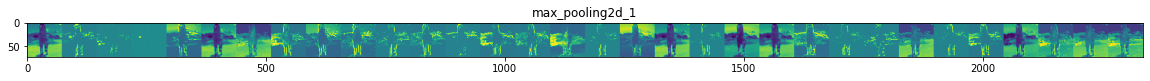

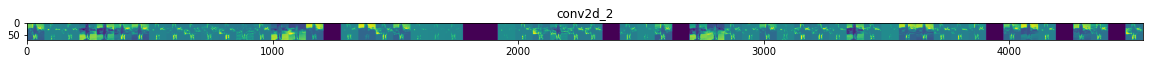

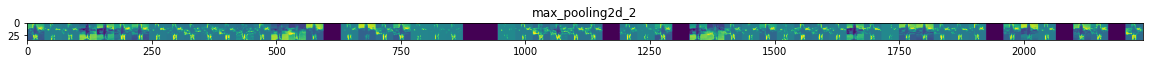

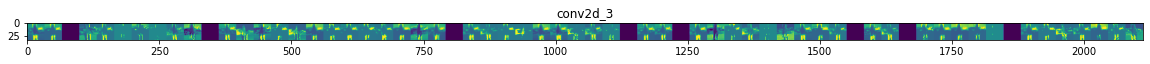

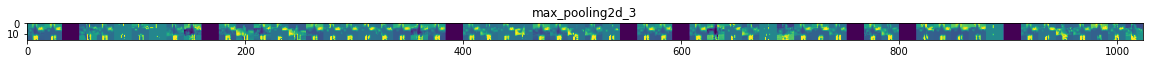

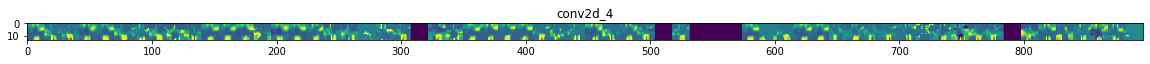

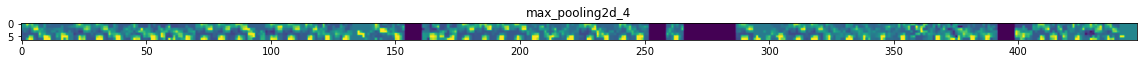

In [28]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
# To terminate the kernal and free the memory resources
import os, signal
os.kill(os.getpid(), signal.SIGKILL)